# Project2 > Vanguard Digital Experiment 
EDA & Data Cleaning

1. Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

2. Load Data

In [35]:
# Load datasets

demo = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_demo.txt")
web1 = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_web_data_pt_1.txt")
web2 = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_web_data_pt_2.txt")
exp = pd.read_csv("https://raw.githubusercontent.com/flowind0/IronHack_Project2/main/df_final_experiment_clients.txt")


# Merge the two web data parts
web_data = pd.concat([web1, web2], ignore_index=True)

print('Demo shape:', demo.shape)
print('Web data shape:', web_data.shape)
print('Experiment shape:', exp.shape)

Demo shape: (70609, 9)
Web data shape: (755405, 5)
Experiment shape: (70609, 2)


3. Inspect Data

In [36]:
# Quick look at each dataset
print('\nDemo Data Preview:')
demo.head()

print('\nWeb Data Preview:')
web_data.head()

print('\nExperiment Data Preview:')
exp.head()


Demo Data Preview:

Web Data Preview:

Experiment Data Preview:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [37]:
demo.info()
web_data.info()
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-n

Data Info and Summary

In [38]:
demo.info()
web_data.info()
exp.info()

# Basic statistics
demo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-n

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595,70595.000000,7.059500e+04,70595.000000,70595.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,24122,NaN,NaN,NaN,NaN
mean,5.004992e+06,12.052950,150.659367,46.442240,NaN,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,NaN,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,NaN,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,NaN,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,NaN,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,NaN,2.000000,1.375449e+05,6.000000,7.000000


In [39]:
demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [40]:
exp.isnull().sum()
exp_clean = exp.dropna(subset=['Variation'])
exp = exp_clean

In [41]:
exp.isnull().sum()

client_id    0
Variation    0
dtype: int64

4. Data Cleaning

In [42]:
# Convert date_time to datetime
web_data['date_time'] = pd.to_datetime(web_data['date_time'], errors='coerce')

# Check for missing values
print('Missing values per dataset:')
print('Demo:', demo.isna().sum().sum())
print('Web data:', web_data.isna().sum().sum())
print('Experiment:', exp.isna().sum().sum())

Missing values per dataset:
Demo: 113
Web data: 0
Experiment: 0


Merge Datasets

In [43]:
# Merge demographics, web data, and experiment info
merged = web_data.merge(exp, on='client_id', how='left').merge(demo, on='client_id', how='left')

print('Merged dataset shape:', merged.shape)
merged.head()

Merged dataset shape: (755405, 14)


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


5. Exploratory Data Analysis (EDA)

5.1 Demographics Overview

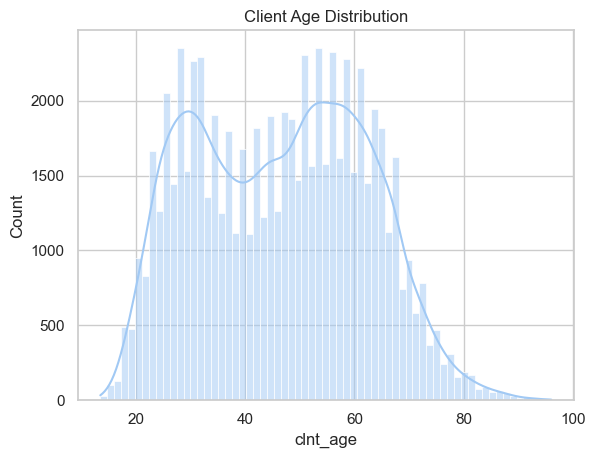

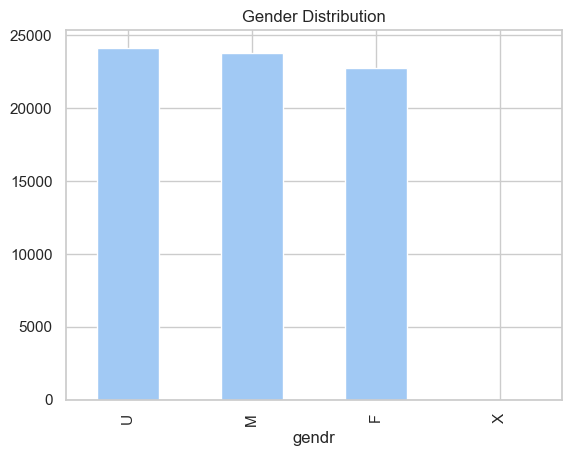

In [44]:
# Age distribution
sns.histplot(demo['clnt_age'], kde=True)
plt.title('Client Age Distribution')
plt.show()

# Gender distribution
demo['gendr'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

5.2 Client Tenure and Balance

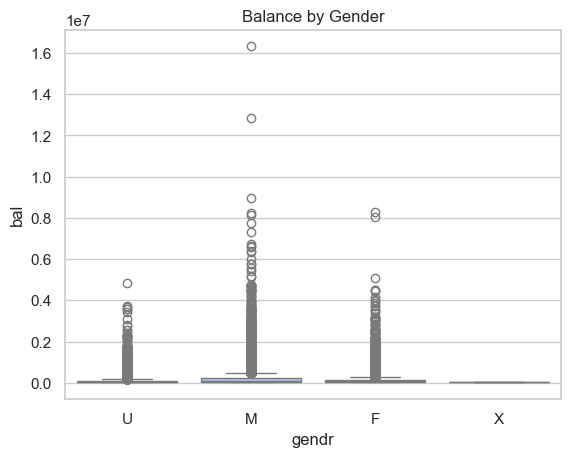

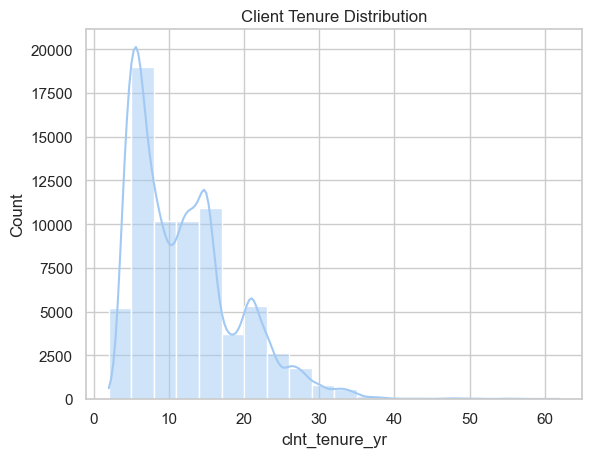

In [45]:
sns.boxplot(x='gendr', y='bal', data=demo)
plt.title('Balance by Gender')
plt.show()

sns.histplot(demo['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Client Tenure Distribution')
plt.show()

5.3 Process Behavior

In [46]:
# Combine both web data parts first
web_data = pd.concat([web1, web2], ignore_index=True)

# Merge experiment info into web data
web_data = web_data.merge(exp[['client_id', 'Variation']], on='client_id', how='left')

# Merge client demographic info (optional but recommended)
web_data = web_data.merge(demo, on='client_id', how='left')


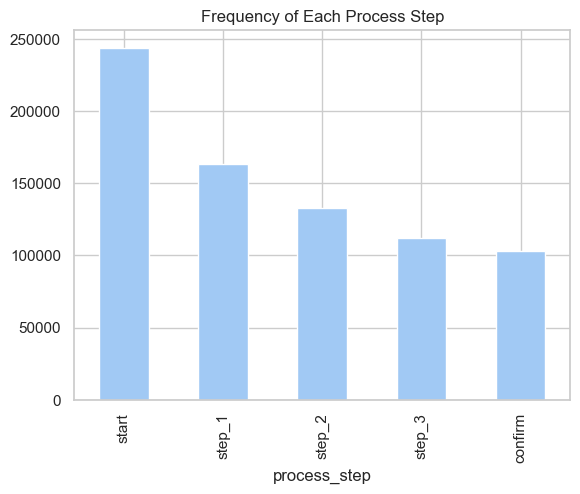

Completion Rate by Variation (%):
Variation
Control    12.201837
Test       14.462993
dtype: float64


In [47]:
web_data['process_step'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Process Step')
plt.show()

# Completion rate estimation
completion_counts = web_data.groupby('Variation')['process_step'].apply(lambda x: (x == 'confirm').sum())
total_counts = web_data['Variation'].value_counts()
completion_rate = (completion_counts / total_counts) * 100
print('Completion Rate by Variation (%):')
print(completion_rate)

5.4 Correlation Heatmap (Demographics)

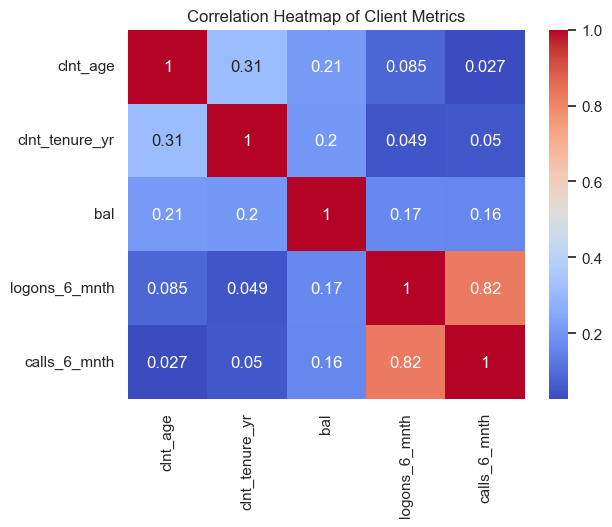

In [48]:
numeric_cols = ['clnt_age','clnt_tenure_yr','bal','logons_6_mnth','calls_6_mnth']
sns.heatmap(demo[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Client Metrics')
plt.show()

C:\Users\migue\AppData\Local\Temp\ipykernel_1820\1928640288.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  web_data.groupby(['Variation', 'age_group'])['process_step']


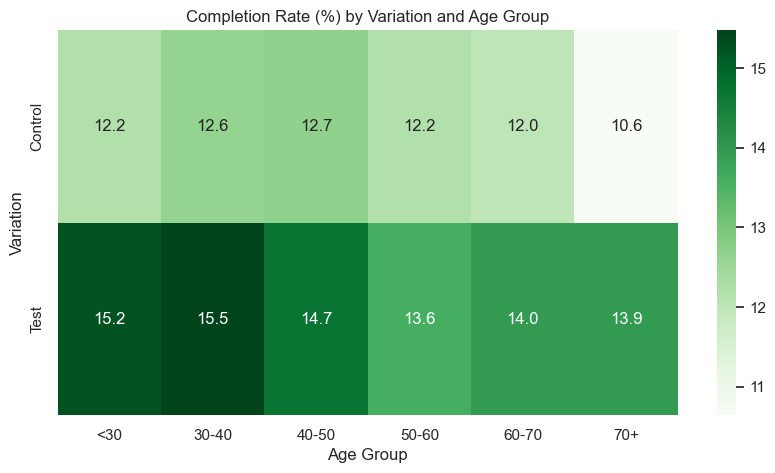

In [49]:
# Example: Create age bins
web_data['age_group'] = pd.cut(web_data['clnt_age'], bins=[0,30,40,50,60,70,100], labels=['<30','30-40','40-50','50-60','60-70','70+'])

# Compute completion rate by variation and age group
completion_heat = (
    web_data.groupby(['Variation', 'age_group'])['process_step']
    .apply(lambda x: (x == 'confirm').sum() / len(x))
    .unstack()
)

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(completion_heat * 100, annot=True, fmt=".1f", cmap='Greens')
plt.title('Completion Rate (%) by Variation and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Variation')
plt.show()


In [50]:
# Create a completion flag: 1 if 'confirm' step exists for that client_id, else 0
completion_status = (
    web_data.groupby('client_id')['process_step']
    .apply(lambda x: 1 if 'confirm' in x.values else 0)
    .reset_index(name='confirm')
)

# Merge this completion flag back into your main web_data
web_data = web_data.merge(completion_status, on='client_id', how='left')

# Optional: Check
web_data[['client_id', 'Variation', 'confirm']].drop_duplicates().head()


,client_id,Variation,confirm
0,9988021,Test,0
8,8320017,Test,1
13,4033851,Control,1
24,1982004,Test,1
29,9294070,Control,0


In [51]:
demo_summary = web_data.drop_duplicates(subset='client_id')[['client_id', 'clnt_age', 'gendr', 'Variation', 'confirm']]

# Create age bins (adjust ranges to fit your data)
demo_summary['age_group'] = pd.cut(
    demo_summary['clnt_age'],
    bins=[0, 30, 40, 50, 60, 70, 100],
    labels=['<30', '30–40', '40–50', '50–60', '60–70', '70+']
)

C:\Users\migue\AppData\Local\Temp\ipykernel_1820\3739858141.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = subset.pivot_table(


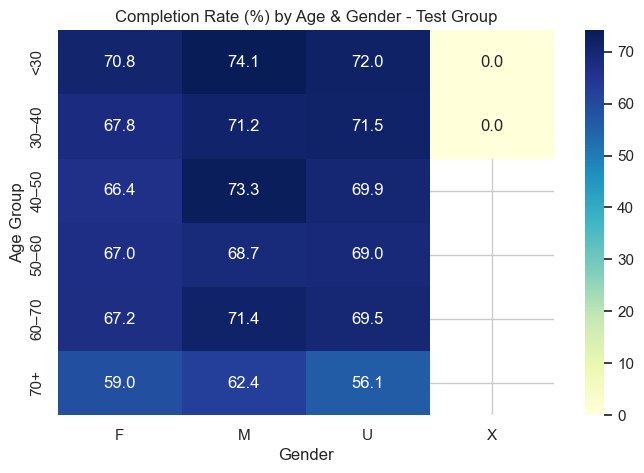

C:\Users\migue\AppData\Local\Temp\ipykernel_1820\3739858141.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = subset.pivot_table(


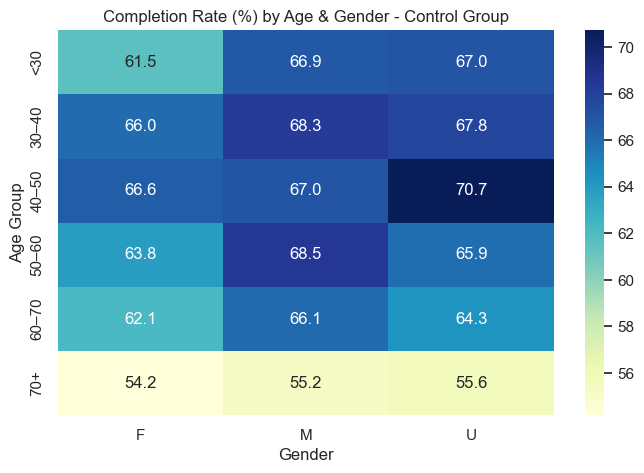

⚠ No data found for Variation = nan, skipping...


In [53]:

for var in demo_summary['Variation'].unique():
    subset = demo_summary[demo_summary['Variation'] == var]
    
    # If there is no data for this variation, skip
    if subset.empty:
        print(f"⚠ No data found for Variation = {var}, skipping...")
        continue
    
    heat_data = subset.pivot_table(
        index='age_group',
        columns='gendr',
        values='confirm',
        aggfunc='mean'
    ) * 100

    # If pivot produced no rows or columns, skip
    if heat_data.size == 0:
        print(f"⚠ Pivot table empty for Variation = {var}, skipping...")
        continue

    plt.figure(figsize=(8,5))
    sns.heatmap(heat_data, annot=True, fmt=".1f", cmap='YlGnBu')
    plt.title(f'Completion Rate (%) by Age & Gender - {var.capitalize()} Group')
    plt.xlabel('Gender')
    plt.ylabel('Age Group')
    plt.show()



C:\Users\migue\AppData\Local\Temp\ipykernel_26132\4042412563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_summary.groupby(['Variation', 'age_group', 'gendr'])['confirm']
C:\Users\migue\AppData\Local\Temp\ipykernel_26132\4042412563.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_combined = combined.pivot_table(index=['age_group', 'gendr'], columns='Variation', values='confirm') * 100


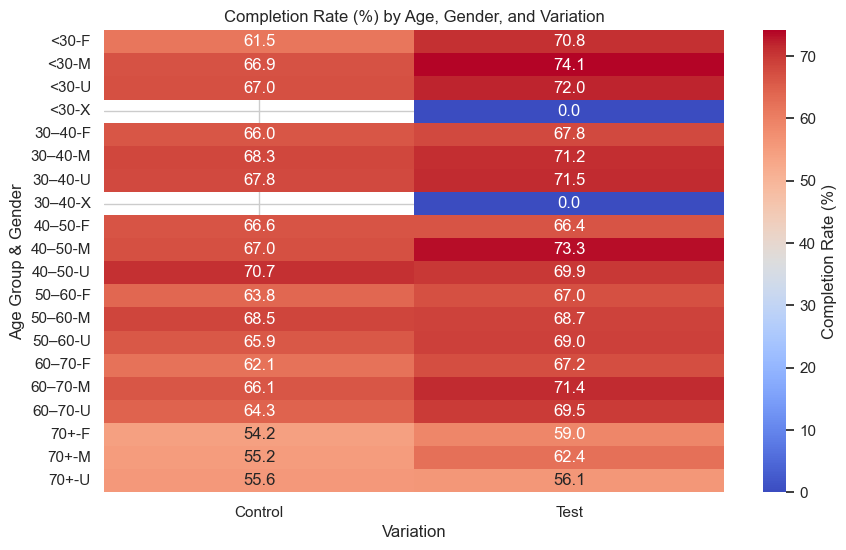

In [ ]:
combined = (
    demo_summary.groupby(['Variation', 'age_group', 'gendr'])['confirm']
    .mean()
    .reset_index()
)

pivot_combined = combined.pivot_table(index=['age_group', 'gendr'], columns='Variation', values='confirm') * 100

plt.figure(figsize=(10,6))
sns.heatmap(pivot_combined, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Completion Rate (%)'})
plt.title('Completion Rate (%) by Age, Gender, and Variation')
plt.ylabel('Age Group & Gender')
plt.xlabel('Variation')
plt.show()

In [54]:
web_data[numeric_cols].dtypes

web_data.isnull().sum()

#web_data.Variation.value_counts()
web_data.dropna(subset=['Variation'])

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group,confirm
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70+,0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70+,0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70+,0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70+,0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,70+,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0,50-60,1
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,30-40,0
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,30-40,0
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,30-40,0


In [55]:
# Convert timestamps to datetime
web_data['date_time'] = pd.to_datetime(web_data['date_time'], errors='coerce')

# Sort events in proper order
web_data = web_data.sort_values(by=['client_id', 'date_time'])

# Calculate time difference between consecutive actions per client
web_data['time_diff'] = web_data.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Optional: Cap extreme outliers (e.g. idle users)
web_data.loc[web_data['time_diff'] > 3600, 'time_diff'] = None  # cap at 1 hour

In [56]:
time_summary = (
    web_data.groupby(['Variation', 'process_step'])['time_diff']
    .mean()
    .reset_index()
)

print(time_summary.head())

  Variation process_step   time_diff
0   Control      confirm  128.659716
1   Control        start  165.351575
2   Control       step_1   43.233851
3   Control       step_2   39.111991
4   Control       step_3   93.186253


In [ ]:
# Map steps to numeric order
step_order = {'initial': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
web_data['step_num'] = web_data['process_step'].map(step_order)

# Identify backward moves
web_data['prev_step'] = web_data.groupby('client_id')['step_num'].shift(1)
web_data['went_back'] = (web_data['step_num'] < web_data['prev_step']).astype(int)

# Calculate error rate by variation
error_rate = (
    web_data.groupby('Variation')['went_back']
    .mean()
    .reset_index(name='error_rate')
)

print(error_rate)

  Variation  error_rate
0   Control    0.033786
1      Test    0.032545


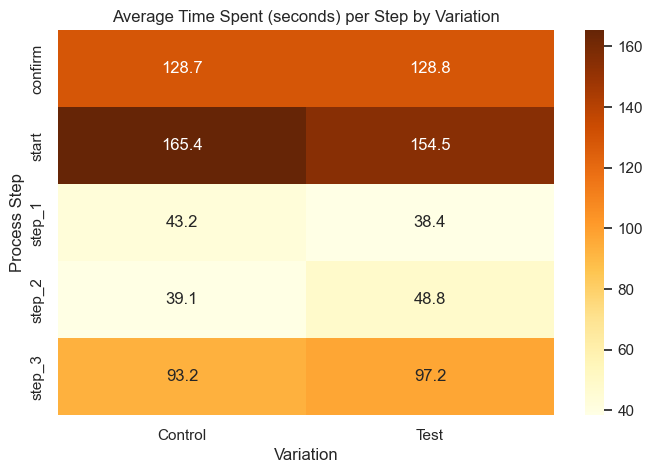

In [57]:
pivot_time = time_summary.pivot(index='process_step', columns='Variation', values='time_diff')

plt.figure(figsize=(8,5))
sns.heatmap(pivot_time, annot=True, fmt=".1f", cmap='YlOrBr')
plt.title('Average Time Spent (seconds) per Step by Variation')
plt.xlabel('Variation')
plt.ylabel('Process Step')
plt.show()

In [59]:
performance_summary = (
    web_data.groupby('Variation')['process_step']
    .apply(lambda x: pd.Series({
        'completion_rate': (x == 'confirm').mean() * 100,
        'error_rate': (x == 'error').mean() * 100
    }))
    .reset_index()
)

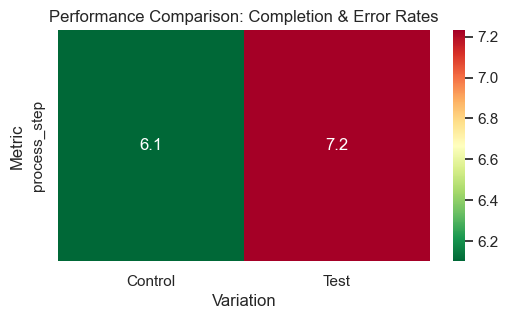

In [71]:
performance_summary.columns = performance_summary.columns.str.lower()

pivot_perf = performance_summary.melt(
    id_vars='variation',
    var_name='metric',
    value_name='value'
)

pivot_perf['value'] = pd.to_numeric(pivot_perf['value'], errors='coerce')

pivot_perf = pivot_perf.pivot_table(
    index='metric',
    columns='variation',
    values='value',
    aggfunc='mean'
)

plt.figure(figsize=(6,3))
sns.heatmap(pivot_perf, annot=True, fmt=".1f", cmap='RdYlGn_r')
plt.title('Performance Comparison: Completion & Error Rates')
plt.xlabel('Variation')
plt.ylabel('Metric')
plt.show()

In [69]:
performance_summary

,variation,level_1,process_step
0,Control,completion_rate,12.201837
1,Control,error_rate,0.000000
2,Test,completion_rate,14.462993
3,Test,error_rate,0.000000


In [72]:
web_data[numeric_cols].isnull().mean() * 100

clnt_age          40.468490
clnt_tenure_yr    40.466902
bal               40.466902
logons_6_mnth     40.466902
calls_6_mnth      40.466902
dtype: float64

Insights

-> Who are the primary clients (age, gender, tenure)? Age> between 30/60, Gender> unable to tell due to Undifined values, Tenured> 5years

-> Are there visible differences between control and test groups? > 2.3% of completion rate

-> Are there any anomalies, missing data, or outliers? not enough data to calculate Gender majority and incomplete/Nan on the Variation column

-> Design Effectiveness: 
-> Duration: short time until test completion (~8min)
-> Additional Data Needs: 

<Axes: xlabel='gendr', ylabel='Count'>

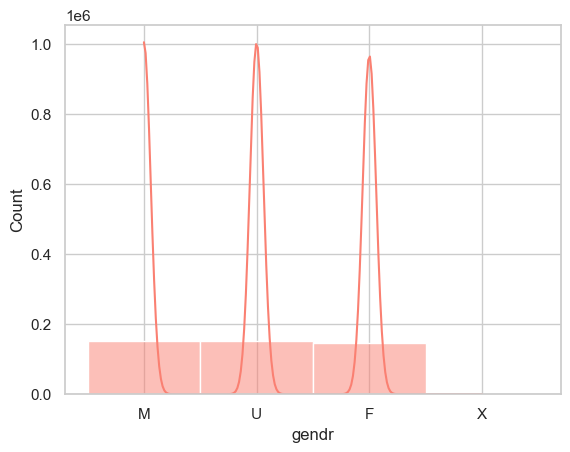

In [78]:
sns.histplot(web_data['gendr'], kde=True, bins=30, color="salmon")

<Axes: xlabel='Variation', ylabel='Count'>

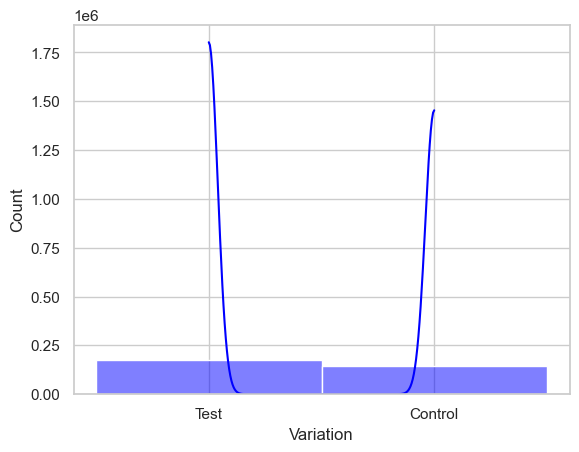

In [82]:
sns.histplot(web_data['Variation'], kde=True, bins=30, color="Blue")

In [84]:
stats.probplot(web_data['variation'], plot=plt

_IncompleteInputError: incomplete input (2746723139.py, line 1)